# TD Machine Learning - Prédiction de la Qualité de l'Air Mondiale

**Master 1 - Concepts & Technologies IA**

---

**Nom :** PIBRE 
**Prénom :** Alec 

---

## Objectifs

Dans ce TD, vous allez :
1. Analyser un dataset réel de pollution de l'air mondiale (23,000+ villes)
2. Préparer les données environnementales pour le Machine Learning
3. Entraîner et comparer plusieurs algorithmes de classification
4. Optimiser les performances de vos modèles
5. Interpréter les résultats dans un contexte de santé publique

**Votre travail contribue à la protection de l'environnement et de la santé publique !**

---

## Configuration et Imports

In [46]:

# Imports des bibliothèques nécessaires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
import country_converter as coco
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Configuration de l'affichage
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Options pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 3)

# Pour la reproductibilité
np.random.seed(42)

# Ignorer les warnings
import warnings
warnings.filterwarnings('ignore')

print("Imports réussis !")

Imports réussis !


---

# Partie 1 : Chargement et Exploration des Données

---

## Exercice 1.1 : Chargement des données

**Instructions :**
1. Téléchargez le dataset depuis Kaggle (ou utilisez le script fourni)
2. Chargez le dataset Global Air Pollution
3. Affichez les informations de base

In [2]:

df = pd.read_csv("data/global air pollution dataset.csv")

print(f"Nb lignes : {len(df)}")
print(f"Nb colonnes : {len(df.columns)}")

Nb lignes : 23463
Nb colonnes : 12


In [3]:

df.head()

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [4]:

df.shape[0]

23463

In [5]:

nb_pays = df['Country'].nunique()
nb_villes = df['City'].nunique()

print(f"Nb pays : {nb_pays}")
print(f"Nb villes : {nb_villes}")

Nb pays : 175
Nb villes : 23462


In [6]:

df.isnull().sum()

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64

In [7]:

df.dtypes

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

**Questions :**

1. Combien d'observations avez-vous ?
   > Votre réponse : 23463.

2. Combien de pays et de villes sont représentés ?
   > Votre réponse : 175 pays et 23462 villes.

3. Y a-t-il des valeurs manquantes ?
   > Votre réponse : il manque 1 ville et 427 pays.

4. Quels sont les types de données de chaque colonne ?
   > Votre réponse : 
      object : Country, City, AQI Category, CO AQI Category, Ozone AQI Category, NO2 AQI Category, PM2.5 AQI Category.
      int64 : AQI Value, CO AQI Value, Ozone AQI Value, NO2 AQI Value, PM2.5 AQI Value.

## Exercice 1.2 : Analyse statistique descriptive

In [8]:

df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000,23463.000,23463.000,23463.000,23463.000
mean,72.011,1.368,35.194,3.063,68.520
std,56.055,1.832,28.099,5.254,54.796
min,6.000,0.000,0.000,0.000,0.000
25%,39.000,1.000,21.000,0.000,35.000
50%,55.000,1.000,31.000,1.000,54.000
75%,79.000,1.000,40.000,4.000,79.000
max,500.000,133.000,235.000,91.000,500.000


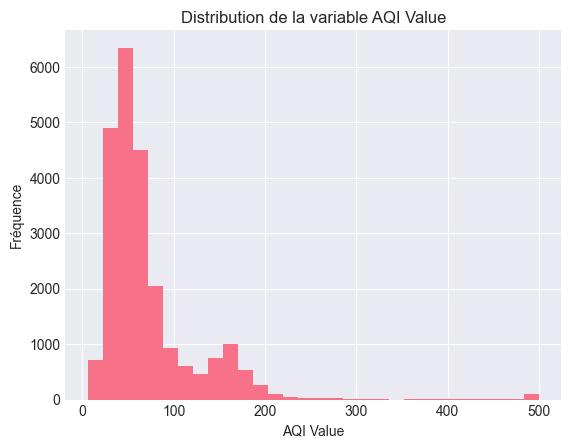

In [9]:

plt.hist(df['AQI Value'], bins=30)
plt.xlabel('AQI Value')
plt.ylabel('Fréquence')
plt.title('Distribution de la variable AQI Value')

plt.show()

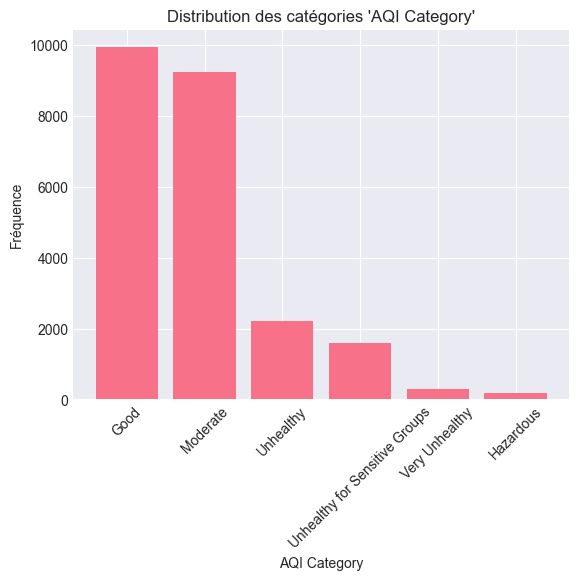

In [10]:

counts = df['AQI Category'].value_counts()

plt.bar(counts.index, counts.values)
plt.xlabel('AQI Category')
plt.ylabel('Fréquence')
plt.title("Distribution des catégories 'AQI Category'")
plt.xticks(rotation=45)

plt.show()

In [11]:

moyenne_villes = df.groupby('City')['AQI Value'].mean().sort_values()
pire_villes = moyenne_villes.tail(5)

print(f"Pires villes : {pire_villes}")

Pires villes : City
Kanina       500.0
Gajraula     500.0
Nagaur       500.0
Khairabad    500.0
Bawal        500.0
Name: AQI Value, dtype: float64


In [12]:

moyenne_pays = df.groupby('Country')['AQI Value'].mean().sort_values()
pire_pays = moyenne_pays.tail(5)
meilleur_pays = moyenne_pays.head(5)

print(f"Meilleurs pays : {meilleur_pays} \n")
print(f"Pires pays : {pire_pays}")

Meilleurs pays : Country
Palau                               16.000
Solomon Islands                     18.000
Maldives                            19.000
Iceland                             23.000
Bolivia (Plurinational State of)    23.788
Name: AQI Value, dtype: float64 

Pires pays : Country
United Arab Emirates    163.667
Pakistan                178.788
Mauritania              179.000
Bahrain                 188.000
Republic of Korea       421.000
Name: AQI Value, dtype: float64


**Questions :**

1. Quelle est la distribution de l'AQI ? Est-elle équilibrée ?
   > Votre réponse : elle n’est pas équilibrée, il y a beaucoup plus de villes avec une bonne ou moyenne qualité d'air alors que peu de villes ont une qualité d'aire dangereuse

2. Quelles sont les villes les plus polluées ?
   > Votre réponse : les villes les plus polluées sont : Bawal, Khairabad, Nagaur, Gajraula et Kanina.

3. Quels pays ont la meilleure/pire qualité d'air en moyenne ?
   > Votre réponse :  les pays avec la meilleure qualité d'air sont : Palau, Solomon Islands, Madives, Iceland et Bolivia. Alors que les pays avec la pire qualité d'air sont : Republic of Korea, Bahrain, Mauritania, Pakistan et United Arab Emirates

## Exercice 1.3 : Visualisation des données

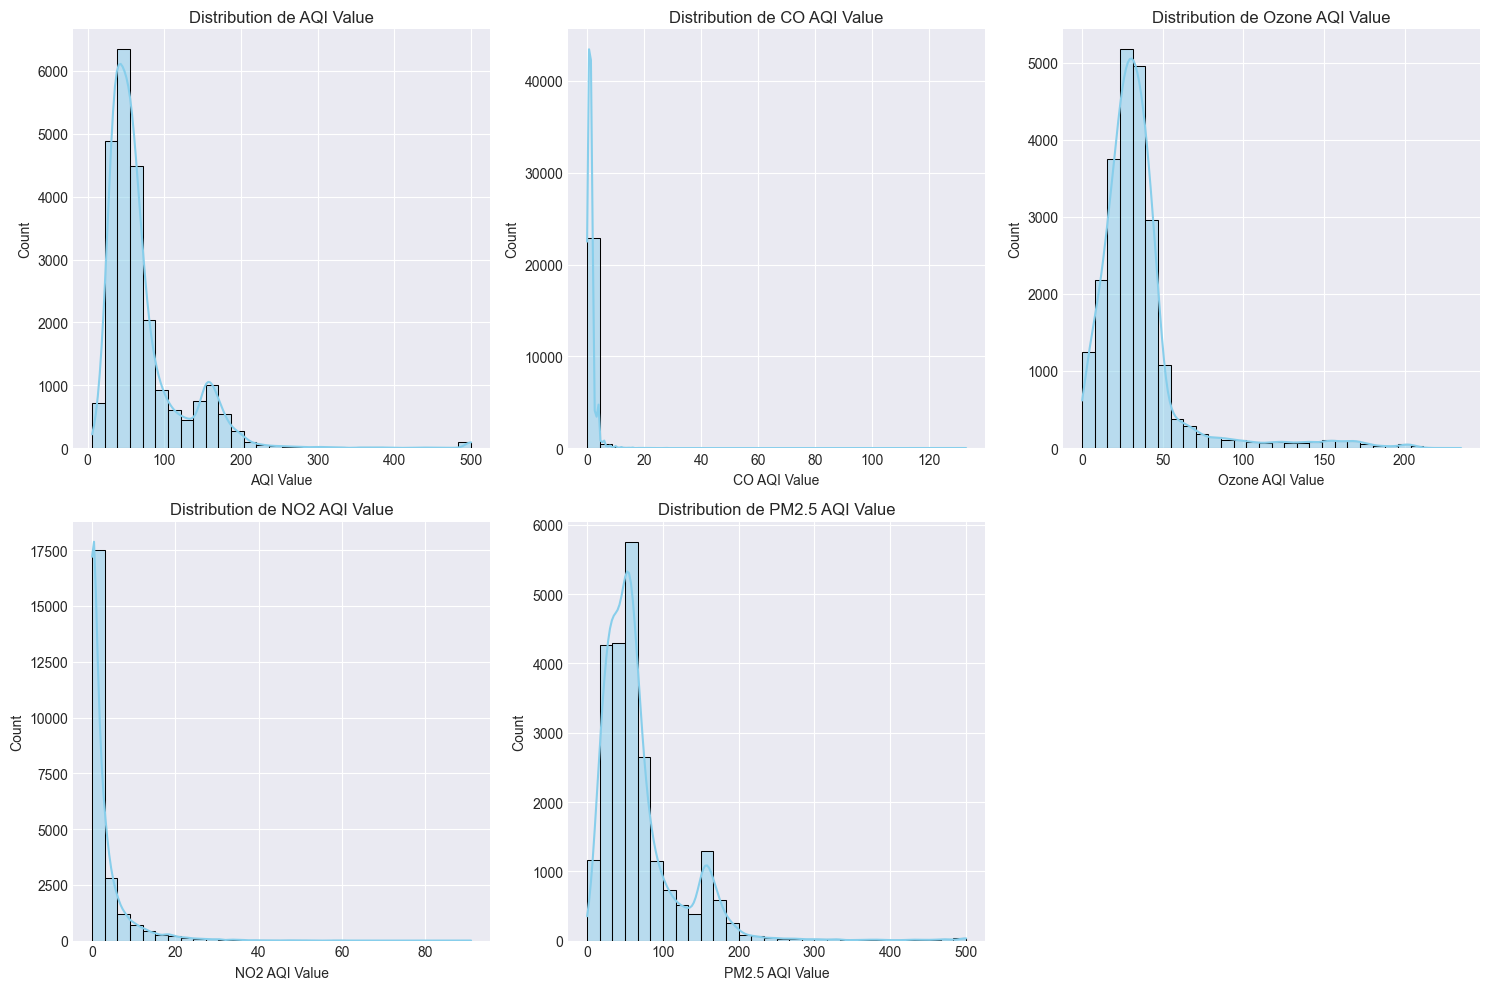

In [13]:

pollutants = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

plt.figure(figsize=(15,10))

for i, col in enumerate(pollutants, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution de {col}')
    
plt.tight_layout()
plt.show()

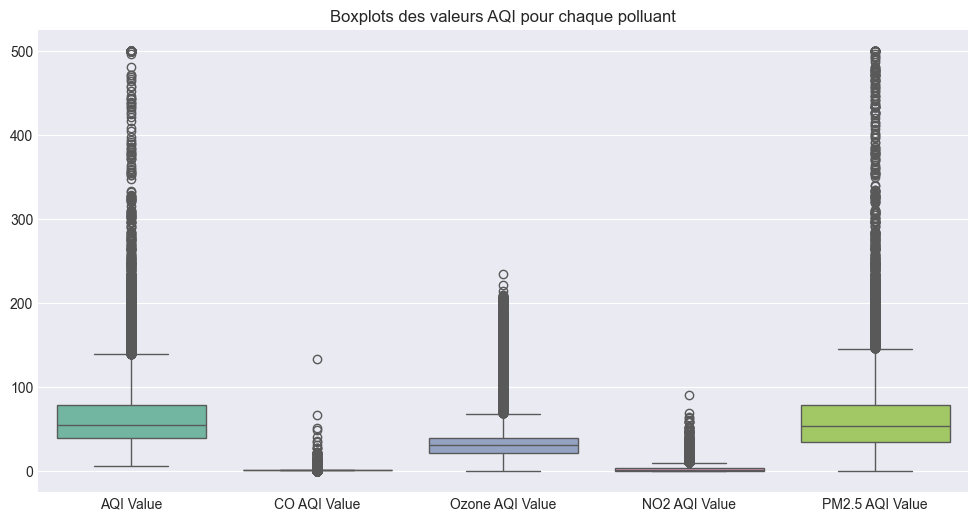

In [14]:

plt.figure(figsize=(12,6))
sns.boxplot(data=df[pollutants], palette="Set2")
plt.title("Boxplots des valeurs AQI pour chaque polluant")
plt.show()

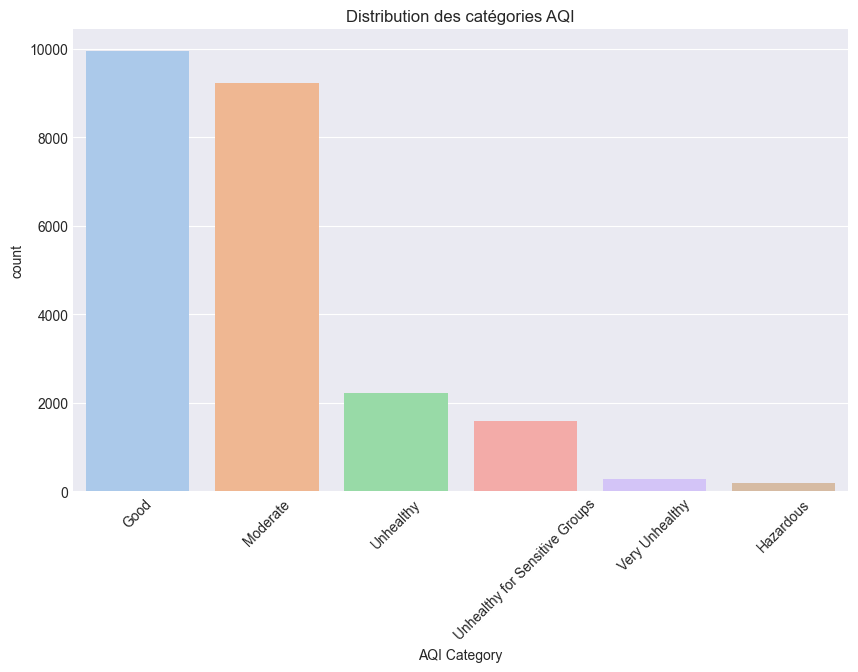

In [15]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='AQI Category', order=df['AQI Category'].value_counts().index, palette='pastel')
plt.title("Distribution des catégories AQI")
plt.xticks(rotation=45)
plt.show()

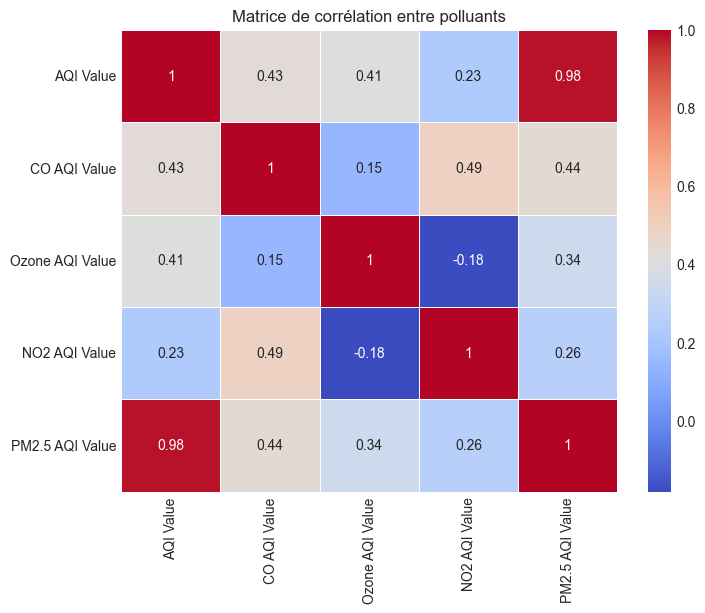

In [16]:

plt.figure(figsize=(8,6))
corr = df[pollutants].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matrice de corrélation entre polluants")
plt.show()

In [17]:

country_mean = df.groupby("Country")["AQI Value"].mean().reset_index()
country_mean.columns = ["Country", "AQI_mean"]

fig = px.choropleth(
    country_mean,
    locations="Country",
    locationmode="country names",
    color="AQI_mean",
    color_continuous_scale="OrRd",
    title="Moyenne de l'AQI par pays",
)

fig.show()


---

# Partie 2 : Préparation des Données

---

## Exercice 2.1 : Nettoyage des données

### Gérez les valeurs manquantes

In [18]:

df = df.dropna()
print("suppression des valeurs Na")

suppression des valeurs Na


### Traitez les outliers identifiés

In [19]:

num_cols = ["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]

# Calcul du Z-score sur les données originales
z_scores = np.abs(stats.zscore(df[num_cols]))
outliers_mask = (z_scores > 3)

# Winsorization : limiter aux bornes ±3 écarts-types (par rapport à la distribution originale)
for col in num_cols:
    mean = df[col].mean()
    std = df[col].std()
    lower_limit = mean - 3*std
    upper_limit = mean + 3*std
    df[col] = df[col].clip(lower=lower_limit, upper=upper_limit)

# gestions des category
def aqi_category(value):
    if 0 <= value <= 50:
        return "Good"
    elif 51 <= value <= 100:
        return "Moderate"
    elif 101 <= value <= 150:
        return "Unhealthy for Sensitive Groups"
    elif 151 <= value <= 200:
        return "Unhealthy"
    elif 201 <= value <= 300:
        return "Very Unhealthy"
    elif 301 <= value <= 500:
        return "Hazardous"


# Colonnes des valeurs et des catégories correspondantes
value_cols = ["AQI Value", "CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]
category_cols = ["AQI Category", "CO AQI Category", "Ozone AQI Category", "NO2 AQI Category", "PM2.5 AQI Category"]

for val_col, cat_col in zip(value_cols, category_cols):
    df[cat_col] = df[val_col].apply(aqi_category)


print("gestion des valeurs outliers avec Winsorization.")


gestion des valeurs outliers avec Winsorization.


### Vérifiez la cohérence des données

In [20]:

print("verification des valeurs null :")
print(df.isna().sum())

verification des valeurs null :
Country               0
City                  0
AQI Value             0
AQI Category          0
CO AQI Value          0
CO AQI Category       0
Ozone AQI Value       0
Ozone AQI Category    0
NO2 AQI Value         0
NO2 AQI Category      0
PM2.5 AQI Value       0
PM2.5 AQI Category    0
dtype: int64


In [21]:

def check_aqi_category(value, category):
    if 0 <= value <= 50 and category != "Good":
        return False
    elif 51 <= value <= 100 and category != "Moderate":
        return False
    elif 101 <= value <= 150 and category != "Unhealthy for Sensitive Groups":
        return False
    elif 151 <= value <= 200 and category != "Unhealthy":
        return False
    elif 201 <= value <= 300 and category != "Very Unhealthy":
        return False
    elif 301 <= value <= 500 and category != "Hazardous":
        return False
    return True

df["AQI_check"] = df.apply(lambda row: check_aqi_category(row["AQI Value"], row["AQI Category"]), axis=1)

print("Nombre d'incohérences AQI Value / AQI Category :", (~df["AQI_check"]).sum())


Nombre d'incohérences AQI Value / AQI Category : 0


In [22]:

print("verification des valeurs hors plages :")
for col in num_cols:
    invalid = df[(df[col] < 0) | (df[col] > 500)]
    print(f"  {col} : {len(invalid)} valeurs hors plage")


verification des valeurs hors plages :
  AQI Value : 0 valeurs hors plage
  CO AQI Value : 0 valeurs hors plage
  Ozone AQI Value : 0 valeurs hors plage
  NO2 AQI Value : 0 valeurs hors plage
  PM2.5 AQI Value : 0 valeurs hors plage


In [23]:

duplicates = df.duplicated(subset=["Country", "City"], keep=False)
print("Vérification du Nb de doublons sur Country+City :", duplicates.sum())

Vérification du Nb de doublons sur Country+City : 0


## Exercice 2.2 : Feature Engineering

In [24]:
good_categories = ["Good", "Moderate"]
df["AQI_binary"] = df["AQI Category"].apply(lambda x: 0 if x in good_categories else 1)

print(df[["AQI Category", "AQI_binary"]])

      AQI Category  AQI_binary
0         Moderate           0
1             Good           0
2         Moderate           0
3             Good           0
4             Good           0
...            ...         ...
23458    Unhealthy           1
23459         Good           0
23460         Good           0
23461     Moderate           0
23462     Moderate           0

[23035 rows x 2 columns]


In [25]:

pollutants = ["CO AQI Value", "Ozone AQI Value", "NO2 AQI Value", "PM2.5 AQI Value"]

df["Pollutants_mean"] = df[pollutants].mean(axis=1)

print(df[["Pollutants_mean"]].head())

   Pollutants_mean
0            22.00
1            12.00
2            27.00
3            13.75
4             7.00


In [26]:

df["Dominant_pollutant"] = df[pollutants].idxmax(axis=1)

df["Dominant_pollutant"] = df["Dominant_pollutant"].str.replace(" AQI Value", "")

print(df[["Dominant_pollutant"]].head())

  Dominant_pollutant
0              PM2.5
1              PM2.5
2              PM2.5
3              Ozone
4              Ozone


In [27]:

df['Continent'] = coco.convert(names=df['Country'], to='continent')

df['Region'] = coco.convert(names=df['Country'], to='UNregion')

print(df.head())

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya       51.0     Moderate           1.0   
1              Brazil  Presidente Dutra       41.0         Good           1.0   
2               Italy   Priolo Gargallo       66.0     Moderate           1.0   
3              Poland         Przasnysz       34.0         Good           1.0   
4              France          Punaauia       22.0         Good           0.0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good             36.0               Good            0.0   
1            Good              5.0               Good            1.0   
2            Good             39.0               Good            2.0   
3            Good             34.0               Good            0.0   
4            Good             22.0               Good            0.0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  AQI_check  AQI_binary  \

**Questions :**

1.  Pourquoi transformer le problème en classification binaire ?
   > Votre réponse : Pour simplifier le probleme

2. Quel est l'impact sur la distribution des classes ?
   > Votre réponse : Perte de nuances

3. Le seuil de 100 AQI est-il pertinent du point de vue santé publique ?
   > Votre réponse : c'est le seuil d'alerte sanitaire

## Exercice 2.3 : Séparation des données

In [28]:

X = df[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'Country', 'City']]

y = df[['AQI Value', 'AQI Category']]

In [29]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=42,
    stratify=df['AQI Category']
)

print("Taille X_train :", X_train.shape)
print("Taille X_test  :", X_test.shape)
print("Taille y_train :", y_train.shape)
print("Taille y_test  :", y_test.shape)


Taille X_train : (16124, 6)
Taille X_test  : (6911, 6)
Taille y_train : (16124, 2)
Taille y_test  : (6911, 2)


## Exercice 2.4 : Normalisation

In [30]:
numeric_features = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

scaler = StandardScaler()

X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])

X_test[numeric_features] = scaler.transform(X_test[numeric_features])

**Questions :**

1. Pourquoi est-il important de normaliser les données ?
   > Votre réponse : pour mettre toute les features à la meme échelle, pour pas qu'il y en ai qui domine.

2. Pourquoi fitter le scaler uniquement sur le train set ?
   > Votre réponse : empêche le data leakage.

# Partie 3 : Modélisation

## Exercice 3.1 : Modèle de référence (Baseline)

In [31]:

y_category_train = y_train['AQI Category']
y_category_test = y_test['AQI Category']

y_train = y_category_train
y_test  = y_category_test

baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train, y_train)

y_pred_baseline = baseline.predict(X_test)

In [32]:

accuracy = accuracy_score(y_test, y_pred_baseline)
print("Accuracy baseline :", accuracy)


Accuracy baseline : 0.4206337722471422


**Questions :**

1. Pourquoi est-il important d'avoir une baseline ?
   > Votre réponse : pour avoir un point de comparaison

## Exercice 3.2 : Régression Logistique

In [33]:

x_numeric_train = X_train[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]
y_numeric_train = y_train

x_numeric_test = X_test[['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']]

logreg = LogisticRegression(max_iter=1000, random_state=42)

logreg.fit(x_numeric_train, y_numeric_train)

y_pred_logreg = logreg.predict(x_numeric_test)

Accuracy : 0.9422659528288236

Classification Report :

                                precision    recall  f1-score   support

                          Good       0.97      0.95      0.96      2907
                      Moderate       0.94      0.96      0.95      2741
                     Unhealthy       0.87      0.96      0.91       636
Unhealthy for Sensitive Groups       0.92      0.78      0.85       484
                Very Unhealthy       0.98      0.80      0.88       143

                      accuracy                           0.94      6911
                     macro avg       0.93      0.89      0.91      6911
                  weighted avg       0.94      0.94      0.94      6911

Matrice de confusion :
 [[2774  133    0    0    0]
 [  97 2632    0   12    0]
 [   0    0  612   22    2]
 [   0   40   65  379    0]
 [   0    0   28    0  115]]


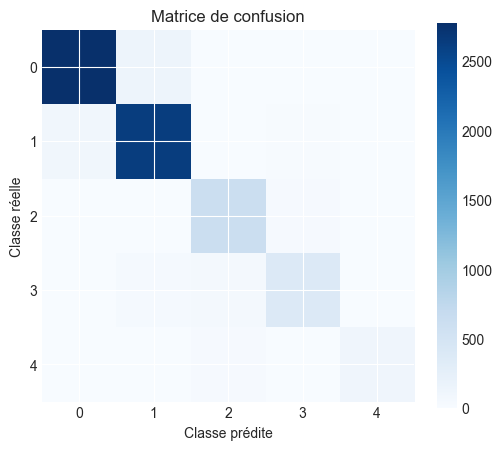

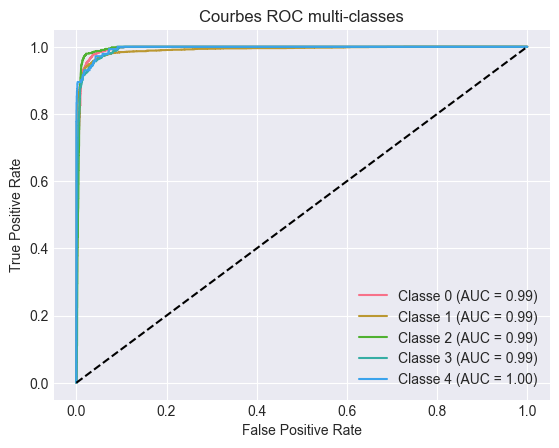

In [34]:

accuracy = accuracy_score(y_test, y_pred_logreg)
print("Accuracy :", accuracy)


print("\nClassification Report :\n")
print(classification_report(y_test, y_pred_logreg))


cm = confusion_matrix(y_test, y_pred_logreg)
print("Matrice de confusion :\n", cm)


plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.colorbar()
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.show()


y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_score = logreg.predict_proba(x_numeric_test)


n_classes = y_test_bin.shape[1]
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    auc = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Classe {i} (AUC = {auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbes ROC multi-classes')
plt.legend()
plt.show()

**Questions :**

1. Le modèle performe-t-il mieux que le baseline ?
   > Votre réponse : Oui.

2. Quelle métrique est la plus pertinente pour ce problème de santé publique ?
   > Votre réponse : c'est le recall pour pas raté les pics.

3. Que nous apprend la matrice de confusion ?
   > Votre réponse : les prédictions sont mieux sur les classes 0 et 1.

4. Quel type d'erreur est le plus grave (faux positif ou faux négatif) ?
   > Votre réponse : le faux positif car ça voudrait dire, rater un pic.

## Exercice 3.3 : K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

num_cols = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']

cat_cols = [col for col in X_train.columns if col not in num_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=5))
])

X_train_data = X_train
y_train_data = y_train['AQI Value']

X_test_data = X_test
y_test_data = y_test['AQI Value']

pipeline.fit(X_train_data, y_train_data)

y_pred = pipeline.predict(X_test_data)

print("MAE :", mean_absolute_error(y_test_data, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test_data, y_pred)))
print("R² :", r2_score(y_test_data, y_pred))


MAE : 3.1048557323584416
RMSE : 5.789642447118434
R² : 0.9847788866074505


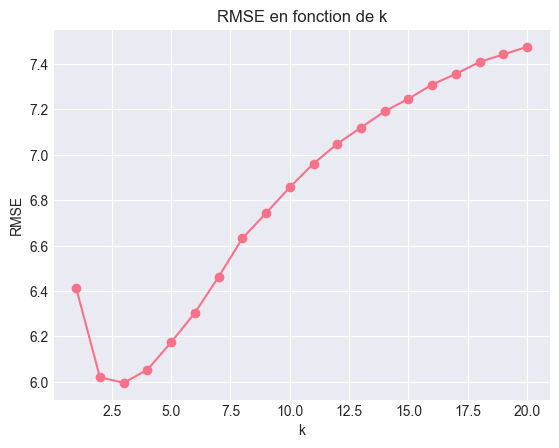

In [55]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

k_values = range(1, 21)
rmse_scores = []

for k in k_values:
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('knn', KNeighborsRegressor(n_neighbors=k))
    ])
    scores = -1 * cross_val_score(pipeline, X_train, y_train['AQI Value'], 
                                  cv=5, scoring='neg_mean_squared_error')
    rmse_scores.append(np.sqrt(scores.mean()))

plt.plot(k_values, rmse_scores, marker='o')
plt.xlabel('k')
plt.ylabel('RMSE')
plt.title('RMSE en fonction de k')
plt.show()


## Exercice 3.4 : Arbre de Décision

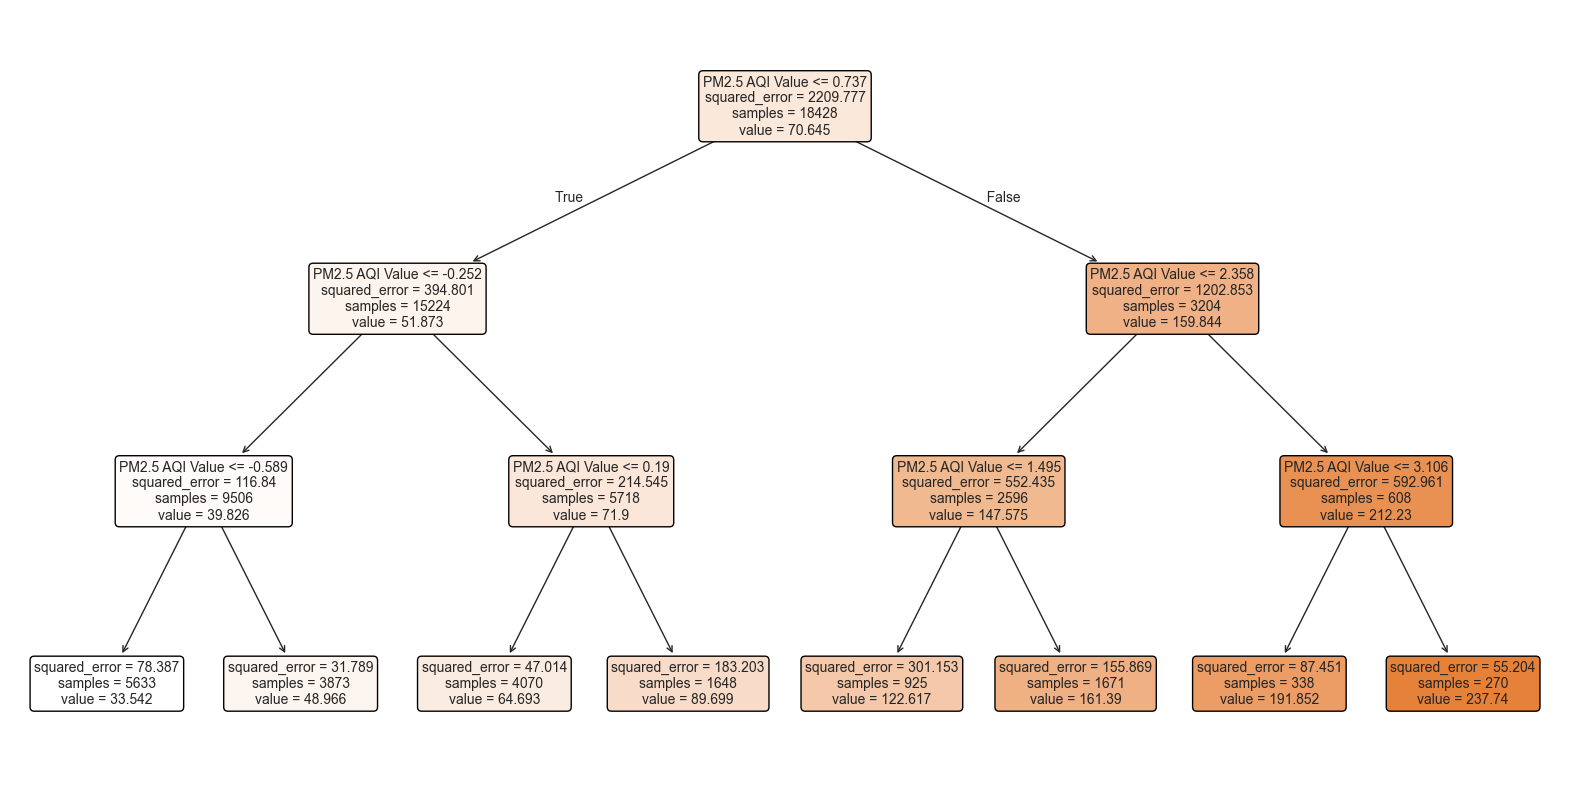

Importance des features :
PM2.5 AQI Value: 1.0000
CO AQI Value: 0.0000
Ozone AQI Value: 0.0000
NO2 AQI Value: 0.0000
Country_Afghanistan: 0.0000
Country_Albania: 0.0000
Country_Algeria: 0.0000
Country_Andorra: 0.0000
Country_Angola: 0.0000
Country_Argentina: 0.0000
Country_Armenia: 0.0000
Country_Aruba: 0.0000
Country_Australia: 0.0000
Country_Austria: 0.0000
Country_Azerbaijan: 0.0000
Country_Bangladesh: 0.0000
Country_Barbados: 0.0000
Country_Belarus: 0.0000
Country_Belgium: 0.0000
Country_Belize: 0.0000
Country_Benin: 0.0000
Country_Bhutan: 0.0000
Country_Bolivia (Plurinational State of): 0.0000
Country_Bosnia and Herzegovina: 0.0000
Country_Botswana: 0.0000
Country_Brazil: 0.0000
Country_Bulgaria: 0.0000
Country_Burkina Faso: 0.0000
Country_Burundi: 0.0000
Country_Cabo Verde: 0.0000
Country_Cambodia: 0.0000
Country_Cameroon: 0.0000
Country_Canada: 0.0000
Country_Central African Republic: 0.0000
Country_Chad: 0.0000
Country_Chile: 0.0000
Country_China: 0.0000
Country_Colombia: 0.000

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

num_cols = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
cat_cols = [col for col in X_train.columns if col not in num_cols]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

tree = DecisionTreeRegressor(max_depth=3, random_state=42)
tree.fit(X_train_processed, y_train['AQI Value'])

plt.figure(figsize=(20,10))
plot_tree(tree, filled=True, feature_names=num_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out()),
          rounded=True, fontsize=10)
plt.show()

importances = tree.feature_importances_
feature_names = num_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Importance des features :")
for feature, imp in feat_imp:
    print(f"{feature}: {imp:.4f}")

y_pred = tree.predict(X_test_processed)

print("\nÉvaluation de l'arbre de décision :")
print("MAE :", mean_absolute_error(y_test['AQI Value'], y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test['AQI Value'], y_pred)))
print("R² :", r2_score(y_test['AQI Value'], y_pred))


## Exercice 3.5 : Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np

# Colonnes numériques et catégorielles
num_cols = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
cat_cols = [col for col in X_train.columns if col not in num_cols]

# Préprocesseur : scaler les numériques, One-Hot encoder les catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Transformer les données
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Entraînement de la Random Forest (100 arbres)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_processed, y_train['AQI Value'])

# Importance des features
feature_names = num_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
importances = rf.feature_importances_
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)

print("Importance des features :")
for feature, imp in feat_imp:
    print(f"{feature}: {imp:.4f}")

# Prédictions
y_pred = rf.predict(X_test_processed)

# Évaluation
print("\nÉvaluation de la Random Forest :")
print("MAE :", mean_absolute_error(y_test['AQI Value'], y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test['AQI Value'], y_pred)))
print("R² :", r2_score(y_test['AQI Value'], y_pred))


Importance des features :
PM2.5 AQI Value: 0.9763
Ozone AQI Value: 0.0204
Country_China: 0.0006
CO AQI Value: 0.0005
NO2 AQI Value: 0.0004
Country_Pakistan: 0.0001
Country_India: 0.0001
City_Eslamshahr: 0.0001
Country_Indonesia: 0.0000
City_Lubu: 0.0000
Country_Iran (Islamic Republic of): 0.0000
City_Weinan: 0.0000
City_Robat Karim: 0.0000
City_Jiazi: 0.0000
City_Hanchuan: 0.0000
City_Qom: 0.0000
City_Jinsha: 0.0000
City_Dongkan: 0.0000
City_Danjiangkou: 0.0000
City_Kresek: 0.0000
City_Sawangan: 0.0000
City_Taixing: 0.0000
City_Shanghai: 0.0000
City_Fangshan: 0.0000
City_Zaida: 0.0000
City_Ashtian: 0.0000
City_Palm Valley: 0.0000
City_Yuxia: 0.0000
City_Suozhen: 0.0000
City_Jinxiang: 0.0000
City_Narayangarh: 0.0000
City_Lakhimpur: 0.0000
City_Sahaspur: 0.0000
Country_Tunisia: 0.0000
City_Shilong: 0.0000
City_Yanliang: 0.0000
City_Cikupa: 0.0000
City_Jakarta: 0.0000
City_Son Tay: 0.0000
City_Labuhan: 0.0000
City_Yancheng: 0.0000
City_Xiantao: 0.0000
City_Ciputat: 0.0000
City_Yangzhou: 0

## Exercice 3.6 : Support Vector Machine (SVM)

In [58]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Colonnes numériques et catégorielles
num_cols = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
cat_cols = [col for col in X_train.columns if col not in num_cols]

# Préprocesseur : scaler les numériques, One-Hot encoder les catégorielles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Transformer les données
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Entraînement du SVM avec noyau RBF
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train_processed, y_train['AQI Value'])

# Prédictions
y_pred = svm_model.predict(X_test_processed)

# Évaluation
print("Évaluation du SVM (RBF) :")
print("MAE :", mean_absolute_error(y_test['AQI Value'], y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test['AQI Value'], y_pred)))
print("R² :", r2_score(y_test['AQI Value'], y_pred))


Évaluation du SVM (RBF) :
MAE : 12.760925586016965
RMSE : 14.012812177729536
R² : 0.910835180279961


# Partie 4 : Optimisation et Comparaison

## Exercice 4.1 : Optimisation des hyperparamètres


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Colonnes numériques et catégorielles
num_cols = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
cat_cols = [col for col in X_train.columns if col not in num_cols]

# Pipeline avec préprocesseur et Random Forest
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(random_state=42))
])

# Grille d'hyperparamètres
param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',  # pour la régression
    n_jobs=-1
)

# Entraînement
grid_search.fit(X_train, y_train['AQI Value'])

# Meilleurs hyperparamètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)

# Meilleur modèle
best_model = grid_search.best_estimator_

# Prédictions sur test
y_pred = best_model.predict(X_test)

# Évaluation
print("\nÉvaluation du meilleur modèle Random Forest :")
print("MAE :", mean_absolute_error(y_test['AQI Value'], y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test['AQI Value'], y_pred)))
print("R² :", r2_score(y_test['AQI Value'], y_pred))


## Exercice 4.2 : Validation croisée


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import numpy as np

# Colonnes numériques et catégorielles
num_cols = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
cat_cols = [col for col in X_train.columns if col not in num_cols]

# Préprocesseur commun à tous les modèles
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Liste des modèles à comparer
models = {
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=3, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR (RBF)": SVR(kernel='rbf')
}

# Fonction pour évaluer chaque modèle avec validation croisée
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Cross-validation 5-fold
    scores = cross_val_score(
        pipeline,
        X_train,
        y_train['AQI Value'],
        cv=5,
        scoring='r2',  # on peut utiliser R² comme métrique
        n_jobs=-1
    )
    
    print(f"{name} : R² moyen = {scores.mean():.4f}, écart-type = {scores.std():.4f}")


KNN : R² moyen = 0.9827, écart-type = 0.0006
Decision Tree : R² moyen = 0.9593, écart-type = 0.0019
Random Forest : R² moyen = 0.9971, écart-type = 0.0004
SVR (RBF) : R² moyen = 0.9128, écart-type = 0.0019


## Exercice 4.3 : Tableau comparatif


In [61]:
import pandas as pd
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Colonnes numériques et catégorielles
num_cols = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
cat_cols = [col for col in X_train.columns if col not in num_cols]

# Préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Modèles
models = {
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=3, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR (RBF)": SVR(kernel='rbf')
}

# DataFrame pour stocker les résultats
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Mesurer le temps d'entraînement
    start_time = time.time()
    pipeline.fit(X_train, y_train['AQI Value'])
    train_time = time.time() - start_time
    
    # Prédictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Évaluation
    results.append({
        "Model": name,
        "MAE_train": mean_absolute_error(y_train['AQI Value'], y_train_pred),
        "MAE_test": mean_absolute_error(y_test['AQI Value'], y_test_pred),
        "RMSE_train": np.sqrt(mean_squared_error(y_train['AQI Value'], y_train_pred)),
        "RMSE_test": np.sqrt(mean_squared_error(y_test['AQI Value'], y_test_pred)),
        "R2_train": r2_score(y_train['AQI Value'], y_train_pred),
        "R2_test": r2_score(y_test['AQI Value'], y_test_pred),
        "Train_time_sec": train_time
    })

# Tableau comparatif
df_results = pd.DataFrame(results)
print(df_results)


           Model  MAE_train  MAE_test  RMSE_train  RMSE_test  R2_train  \
0            KNN      2.414     3.105       4.588      5.790     0.990   
1  Decision Tree      6.459     6.494       9.438      9.654     0.960   
2  Random Forest      0.121     0.312       0.954      2.463     1.000   
3      SVR (RBF)      2.310    12.761       6.240     14.013     0.982   

   R2_test  Train_time_sec  
0    0.985           0.068  
1    0.958           0.099  
2    0.997          25.928  
3    0.911          13.650  


# Partie 5 : Analyse et Interprétation

## Exercice 5.1 : Analyse des erreurs


In [62]:
import pandas as pd
import numpy as np

# Utiliser le meilleur modèle (ici exemple : Random Forest)
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])
best_model.fit(X_train, y_train['AQI Value'])

# Prédictions sur test
y_test_pred = best_model.predict(X_test)

# Calculer l'erreur absolue
errors = np.abs(y_test['AQI Value'] - y_test_pred)

# Définir seuil pour identifier les « mal prédits » (ex. top 25% erreurs)
threshold = np.percentile(errors, 75)
high_error_idx = errors[errors > threshold].index

# Villes mal prédictes
high_error_cities = X_test.loc[high_error_idx]
high_error_cities['AQI_true'] = y_test.loc[high_error_idx, 'AQI Value']
high_error_cities['AQI_pred'] = y_test_pred[errors > threshold]
high_error_cities['Error'] = errors[errors > threshold]

print("Villes avec les plus grandes erreurs :")
print(high_error_cities)


# Statistiques descriptives des features des erreurs importantes
print("\nStatistiques des villes mal prédictes :")
print(high_error_cities.describe())

# Comparer avec l'ensemble test
print("\nStatistiques de l'ensemble test :")
print(X_test.describe())


Villes avec les plus grandes erreurs :
       CO AQI Value  Ozone AQI Value  NO2 AQI Value  PM2.5 AQI Value  \
22411           1.0           95.000            1.0           17.000   
18835           1.0          119.944            1.0           67.000   
3188            2.0          119.944            2.0          191.000   
8249            3.0          119.944            2.0           84.000   
19877           2.0            8.000            9.0          224.000   
...             ...              ...            ...              ...   
22194           1.0           74.000            0.0           42.000   
286             1.0          117.000            1.0           78.000   
14127           4.0          119.944            3.0          234.056   
15605           4.0          119.944            3.0          161.000   
4018            1.0           40.000            0.0          234.056   

                        Country          City  AQI_true  AQI_pred      Error  
22411  United Sta

## Exercice 5.2 : Importance des features

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Colonnes numériques et catégorielles
num_cols = ['CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
cat_cols = [col for col in X_train.columns if col not in num_cols]

# Préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ]
)

# Meilleur modèle : Random Forest
best_model = Pipeline([
    ('preprocessor', preprocessor),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42))
])
best_model.fit(X_train, y_train['AQI Value'])

# Récupérer les importances
feature_names = num_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out())
importances = best_model.named_steps['rf'].feature_importances_

# Créer DataFrame trié
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df.head(10))  # top 10 features


                Feature  Importance
3       PM2.5 AQI Value   9.763e-01
1       Ozone AQI Value   2.039e-02
36        Country_China   5.877e-04
0          CO AQI Value   4.595e-04
2         NO2 AQI Value   4.029e-04
119    Country_Pakistan   1.409e-04
72        Country_India   8.379e-05
4991    City_Eslamshahr   5.645e-05
73    Country_Indonesia   4.671e-05
9441          City_Lubu   4.434e-05
